In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [23]:
data = pd.read_csv("stockprice.csv")

In [24]:
data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,30-December-2022,1960.0,1970.00,1919.36,1930.62,1935.920455,88,23,170361.0,76.0,86.36,50.64,-29.38
1,29-December-2022,1930.0,1950.00,1911.00,1950.00,1913.594203,138,21,264076.0,123.0,89.13,39.00,20.00
2,28-December-2022,1930.0,1948.50,1925.00,1948.50,1940.387097,31,14,60152.0,25.0,80.65,23.50,18.50
3,27-December-2022,1929.5,1929.50,1914.13,1927.00,1925.784615,65,25,125176.0,53.0,81.54,15.37,-2.50
4,26-December-2022,1900.0,1920.00,1898.60,1919.40,1913.166667,48,23,91832.0,29.0,60.42,21.40,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,7-January-2022,1880.0,1880.00,1865.00,1865.62,1867.811321,53,19,98994.0,44.0,83.02,15.00,-14.38
244,6-January-2022,1890.0,1899.00,1842.25,1862.85,1861.631148,122,73,227119.0,88.0,72.13,56.75,-27.15
245,5-January-2022,1870.0,1890.00,1851.37,1889.00,1870.826316,190,78,355457.0,140.0,73.68,38.63,19.00
246,4-January-2022,1860.0,1880.00,1845.10,1875.67,1865.111765,170,61,317069.0,120.0,70.59,34.90,15.67


In [25]:
data.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         7
% Deli. Qty to Traded Qty    7
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [26]:
data.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,248.000000,248.000000,248.000000,248.00000,248.000000,248.000000,248.000000,2.480000e+02,241.000000,241.000000,248.000000,248.000000
mean,1829.896855,1844.226250,1812.704476,1829.67754,1827.970772,238.979839,31.451613,4.330904e+05,203.087137,75.443610,31.521774,-0.219315
std,89.251118,91.380447,90.640426,92.07691,90.980748,940.262369,28.817829,1.728819e+06,928.683282,16.792338,21.841374,22.290272
min,1630.000000,1633.000000,1600.100000,1607.66000,1614.737778,1.000000,1.000000,1.983000e+03,1.000000,20.000000,0.000000,-63.060000
25%,1760.000000,1778.117500,1742.440000,1756.75000,1757.827065,46.250000,15.000000,8.499275e+04,30.000000,62.710000,18.007500,-12.790000
50%,1831.050000,1850.000000,1820.000000,1837.46000,1831.693276,118.000000,24.000000,2.231300e+05,92.000000,77.780000,27.720000,-2.365000
75%,1890.000000,1909.125000,1880.000000,1890.68750,1891.011175,225.000000,39.250000,4.127065e+05,171.000000,89.520000,39.892500,10.200000
max,1996.930000,2099.970000,1990.100000,2081.04000,2068.106195,14602.000000,295.000000,2.689050e+07,14291.000000,100.000000,204.170000,161.040000


In [27]:
data.corr()

C:\Users\kaush\AppData\Local\Temp\ipykernel_15496\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.976145,0.986060,0.970256,0.983629,-0.018509,-0.096177,-0.008196,-0.008976,0.095788,-0.008075,0.003905
High Price,0.976145,1.000000,0.971236,0.986719,0.987974,-0.011976,-0.071962,-0.001527,-0.003070,0.111330,0.153252,0.167428
Low Price,0.986060,0.971236,1.000000,0.979672,0.988442,-0.042437,-0.178185,-0.031669,-0.030155,0.081643,-0.086464,0.098617
Close Price,0.970256,0.986719,0.979672,1.000000,0.989935,-0.029341,-0.139223,-0.018640,-0.017234,0.103168,0.062676,0.245869
WAP,0.983629,0.987974,0.988442,0.989935,1.000000,-0.044104,-0.145654,-0.033388,-0.033009,0.094455,0.031533,0.150749
No.of Shares,-0.018509,-0.011976,-0.042437,-0.029341,-0.044104,1.000000,0.698734,0.999871,0.999133,0.151037,0.126004,-0.047092
No. of Trades,-0.096177,-0.071962,-0.178185,-0.139223,-0.145654,0.698734,1.000000,0.694928,0.689353,0.147348,0.438384,-0.190009
Total Turnover (Rs.),-0.008196,-0.001527,-0.031669,-0.018640,-0.033388,0.999871,0.694928,1.000000,0.999275,0.149885,0.125035,-0.044181
Deliverable Quantity,-0.008976,-0.003070,-0.030155,-0.017234,-0.033009,0.999133,0.689353,0.999275,1.000000,0.160316,0.112239,-0.035174
% Deli. Qty to Traded Qty,0.095788,0.111330,0.081643,0.103168,0.094455,0.151037,0.147348,0.149885,0.160316,1.000000,0.128148,0.042864


In [28]:
y = data["Close Price"]
X = data.drop(columns=["Close Price", "Date", "No.of Shares", "No. of Trades", "Total Turnover (Rs.)", "Deliverable Quantity", "% Deli. Qty to Traded Qty", "Spread High-Low", "Spread Close-Open"], axis=1)

# Data Scaling using Normalization
for vals in X:
    X[vals] = (X[vals] - X[vals].mean())/X[vals].std()

y = (y - y.mean())/y.std()

#X, y = np.array(X), np.array(y)
print(X)
print("*"*100)
print(y)

     Open Price  High Price  Low Price       WAP
0      1.457720    1.376375   1.176688  1.186511
1      1.121590    1.157510   1.084456  0.941116
2      1.121590    1.141095   1.238912  1.235606
3      1.115988    0.933173   1.118988  1.075105
4      0.785460    0.829212   0.947651  0.936417
..          ...         ...        ...       ...
243    0.561373    0.391481   0.576956  0.437901
244    0.673416    0.599403   0.325964  0.369973
245    0.449329    0.500914   0.426581  0.471040
246    0.337286    0.391481   0.357407  0.408229
247    0.057177    0.311267   0.245978  0.272728

[248 rows x 4 columns]
****************************************************************************************************
0      1.096284
1      1.306760
2      1.290470
3      1.056969
4      0.974430
         ...   
243    0.390353
244    0.360269
245    0.644271
246    0.499500
247    0.398172
Name: Close Price, Length: 248, dtype: float64


In [29]:
#plt.scatter(X["Open Price"], y)
#plt.xlabel("Features")
#plt.ylabel("Close Price")
#plt.show()

In [30]:
model = LinearRegression()
model.fit(np.array(X["Open Price"]).reshape(-1, 1), np.array(y).reshape(-1, 1))


LinearRegression()

In [31]:
model.coef_

array([[0.97025596]])

In [32]:
model.intercept_

array([5.43396376e-16])

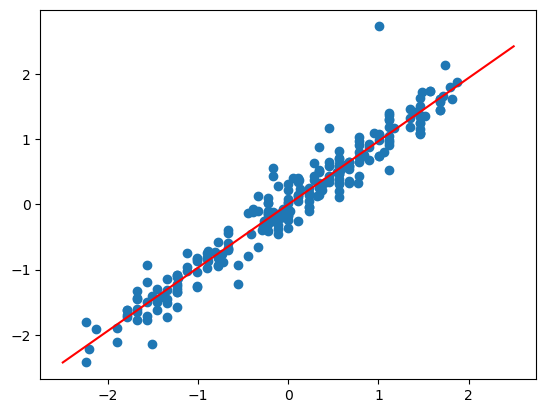

In [33]:
axes = plt.gca()
x_vals = np.linspace(-2.5, 2.5)
y_vals = model.intercept_ + model.coef_[0] * x_vals
plt.plot(x_vals, y_vals, '-', color="red")
plt.scatter(x = np.array(X["Open Price"]), y = y)
plt.show()

In [61]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=2)
model.fit(np.array(x_train), np.array(y_train))

LinearRegression()

In [62]:
model.coef_

array([0.2606723 , 0.24693672, 0.24588593, 0.23546045])

In [63]:
model.intercept_

-0.13304461901949427

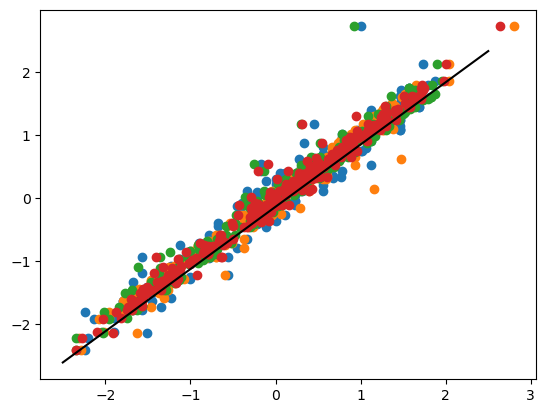

In [64]:
for vals in X:
    plt.scatter(x = np.array(X[vals]), y = y)
    
axes = plt.gca()
x_vals = np.linspace(-2.5, 2.5)
y_vals = model.intercept_ + model.coef_[0] * x_vals + model.coef_[1] * x_vals + model.coef_[2] * x_vals + model.coef_[3] * x_vals
plt.plot(x_vals, y_vals, '-', color="k")
plt.show()

In [65]:
import pickle

with open("Stock Price Model", "wb") as file:
    pickle.dump(model, file)

In [66]:
with open("Stock Price Model", "rb") as file:
    mp = pickle.load(file)

In [67]:
mp.predict([[1880, 1889, 1999, 1000]])

array([1683.38077627])

In [70]:
model.score(x_test, y_test)

C:\Users\kaush\anaconda3\envs\dsprojects\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9580343239945458